## Australia Data Science Jobs - Exploratory Data Analysis

## Set up notebook

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fuzzywuzzy import process
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

/opt/conda/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## read input csv and convert to datasets

In [3]:
file1 = r'/kaggle/input/australia-data-science-jobs/AustraliaDataScienceJobs.csv'
file2 = r'/kaggle/input/australia-data-science-jobs/AustraliaDataScienceJob2.csv'

# Re-importing datasets and checking for data issues
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Combine the datasets
df = pd.concat([df1, df2])

# Fuzzy match job titles

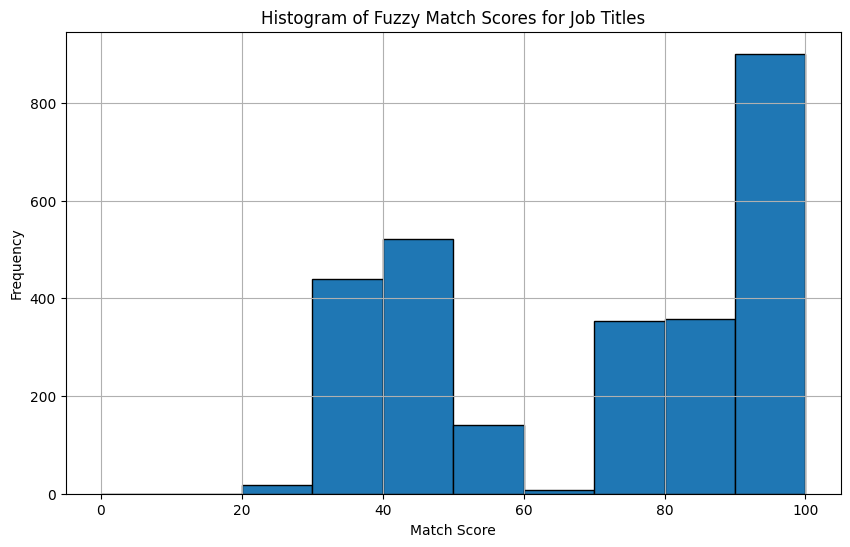

In [4]:
# Checking for non-string values in 'Job Title' column
df['Job Title'] = df['Job Title'].astype(str)

# Define the categories and their possible titles
categories = {
    "Data Analyst": ["data analyst"],
    "Data Engineer": ["data engineer"],
    "Data Scientist": ["data scientist"]
}

def classify_job_title_with_score(title):
    best_match = None
    highest_score = 0
    
    for category, titles in categories.items():
        match, score = process.extractOne(title, titles)
        if score > highest_score:
            highest_score = score
            best_match = category
    
    return best_match if highest_score >= 70 else "Other Analyst", highest_score


#df['Job Category'] = df['Job Title'].apply(classify_job_title)

# Apply function and extract scores
df[['Job Category', 'Match Score']] = df['Job Title'].apply(lambda x: pd.Series(classify_job_title_with_score(x)))

# Plotting the histogram of match scores
plt.figure(figsize=(10, 6))
plt.hist(df['Match Score'], bins=range(0, 101, 10), edgecolor='black')
plt.title('Histogram of Fuzzy Match Scores for Job Titles')
plt.xlabel('Match Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Count and Ave. Salary by Job

In [5]:
# Calculate average salary and count per job category
average_salary_count = df.groupby('Job Category')['High Estimate'].agg(['mean', 'count']).reset_index()
average_salary_count.columns = ['Job Category', 'Average Salary', 'Job Count']

# Format the output to make it prettier
average_salary_count['Average Salary'] = average_salary_count['Average Salary'].apply(lambda x: f"${x:,.2f}")

In [6]:
average_salary_count

,Job Category,Average Salary,Job Count
0,Data Analyst,"$105,477.58",513
1,Data Engineer,"$131,833.66",517
2,Data Scientist,"$132,446.74",582
3,Other Analyst,"$106,983.16",1128


# Pct of time skill mentioned in job

In [25]:
# Extract skill columns
skill_columns = [col for col in df.columns if col.endswith('_yn')]

# Calculate skill percentages per job category
skill_percentages = df.groupby('Job Category')[skill_columns].mean() * 100
skill_percentages = skill_percentages.reset_index()

# Rename columns
skill_percentages.columns = ['Job Category'] + [col.replace('_yn', '') for col in skill_percentages.columns if col != 'Job Category']

# Round percentages to 2 decimal places
skill_percentages = skill_percentages.round(2)

# Calculate the average percentage of times each skill is mentioned across all roles
average_skill_percentage = skill_percentages.iloc[:, 1:].mean(axis=1).round(2)
skill_percentages['Average'] = average_skill_percentage

# Transpose the data to have job titles as columns and skills as rows
skill_percentages_pivot = skill_percentages.set_index('Job Category').transpose()

# Add the average column to the transposed data
skill_percentages_pivot['Average'] = skill_percentages_pivot.mean(axis=1).round(2)

# Sort the output in descending order by the new "Average" column
sorted_skill_percentages_pivot = skill_percentages_pivot.sort_values(by='Average', ascending=False)

# Drop the "Average" column
sorted_skill_percentages_pivot = sorted_skill_percentages_pivot.drop(index='Average')

# Function to highlight top 3 values per column
def highlight_top3(s):
    s_numeric = pd.to_numeric(s, errors='coerce')
    is_top3 = s_numeric >= s_numeric.nlargest(3).min()
    return ['background-color: yellow' if v else '' for v in is_top3]

# Apply the highlight function to each job category column
styled_pivot = sorted_skill_percentages_pivot.style.apply(highlight_top3, subset=sorted_skill_percentages_pivot.columns)

# Replace 0 values with empty strings for display after highlighting
styled_pivot = styled_pivot.format(lambda x: '' if x == 0 else x)

# Display the result
styled_pivot

Job Category,Data Analyst,Data Engineer,Data Scientist,Other Analyst,Average
sql,47.37,25.73,77.15,6.47,39.18
python,43.27,29.59,58.25,15.87,36.75
r,20.27,5.42,50.69,5.94,20.58
mathematic,19.3,8.32,35.91,15.87,19.85
statistic,11.5,6.96,34.88,8.78,15.53
excel,21.64,21.47,8.08,6.91,14.52
tableau,12.67,2.32,27.32,1.15,10.86
aws,12.09,10.64,12.71,6.47,10.48
java,1.75,24.37,10.82,4.7,10.41
c++,0.19,9.86,8.59,9.49,7.03


# Salary and Job count by Company 

In [20]:
# Calculate average salary and count per company
company_salary_count = df.groupby('Company')['High Estimate'].agg(['mean', 'count']).reset_index()
company_salary_count.columns = ['Company', 'Average Salary', 'Job Count']

# Format the salary and sort by job count
company_salary_count['Average Salary'] = company_salary_count['Average Salary'].apply(lambda x: f"${int(x):,}")
company_salary_count = company_salary_count.sort_values(by='Job Count', ascending=False).reset_index(drop=True)

# Display the result
company_salary_count

,Company,Average Salary,Job Count
0,Deloitte,"$97,506",144
1,ANZ Banking Group,"$141,090",100
2,CSIRO,"$102,178",84
3,Give A Grad A Go,"$68,000",60
4,Indeed,"$256,428",56
5,GoTech Solutions Pty Ltd,"$138,888",54
6,NAB - National Australia Bank,"$141,480",50
7,Bristol Myers Squibb,"$107,534",43
8,Australian Antarctic Division,"$92,000",36
9,Department of Transport,"$95,823",34


# Ave. Salary by Job and Company

In [21]:
# Create a pivot table with job titles as columns, companies as rows, and average salary as values
pivot_table = df.pivot_table(index='Company', columns='Job Category', values='High Estimate', aggfunc='mean')

# Format the salaries to integer with commas
pivot_table = pivot_table.applymap(lambda x: f"${int(x):,}" if pd.notnull(x) else '-')

# Display the result
pivot_table

/tmp/ipykernel_33/1401976728.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: f"${int(x):,}" if pd.notnull(x) else '-')


Job Category,Data Analyst,Data Engineer,Data Scientist,Other Analyst
Company,,,,
ACER,-,-,-,"$113,000"
ACRUX,-,-,-,"$150,000"
AECOM,"$84,000",-,"$90,000","$147,666"
AFL Recruitment,-,-,-,"$90,000"
AGL Energy,-,-,"$130,000",-
AIA,-,-,-,"$79,000"
AMP Limited,-,"$173,000",-,-
ANZ Banking Group,"$115,736","$184,000","$143,000","$130,142"
APRA,-,-,"$135,000",-


# Job Count by Job and Company

In [22]:
# Create a pivot table with job titles as columns, companies as rows, and job count as values
pivot_table_counts = df.pivot_table(index='Company', columns='Job Category', values='Job Title', aggfunc='count', fill_value=0)

# Display the result
pivot_table_counts

Job Category,Data Analyst,Data Engineer,Data Scientist,Other Analyst
Company,,,,
ACER,0,0,0,1
ACRUX,0,0,0,1
AECOM,1,0,5,3
AFL Recruitment,0,0,0,1
AGL Energy,0,0,1,0
AIA,0,0,0,1
AMP Limited,0,12,0,0
ANZ Banking Group,38,25,23,14
APRA,0,0,24,0
